In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import requests
import time
import pprint
import csv
fire = "data/forest_fire_1998-2017_new.csv"
rain = "data/precipitation_new.csv"
fire_df = pd.read_csv(fire)
rain_df = pd.read_csv(rain)

In [2]:
fire_df.head()

,Ano,State,Month,Number,Date
0,1998,AC,Jan,0,1/1/1998
1,1999,AC,Jan,0,1/1/1999
2,2000,AC,Jan,0,1/1/2000
3,2001,AC,Jan,0,1/1/2001
4,2002,AC,Jan,0,1/1/2002


In [3]:
rain_df.head()

,state,Unnamed: 1,year,month,precipitation
0,AC,1/31/1998,1998,Jan,335.5
1,AC,2/28/1998,1998,Feb,299.4
2,AC,3/31/1998,1998,Mar,396.7
3,AC,4/30/1998,1998,Apr,102.7
4,AC,5/31/1998,1998,May,19.0


In [4]:
new_fire_df = fire_df.rename(columns={"Ano":"Year"})

In [5]:
new_fire_df = new_fire_df.drop(["Date"], axis=1)

In [6]:
new_fire_df = new_fire_df.rename(columns={"Number": "Number of Fires"})

In [7]:
new_fire_df.head()

,Year,State,Month,Number of Fires
0,1998,AC,Jan,0
1,1999,AC,Jan,0
2,2000,AC,Jan,0
3,2001,AC,Jan,0
4,2002,AC,Jan,0


In [8]:
newdf = new_fire_df.drop(["Month"], axis=1)
newdf.head()

,Year,State,Number of Fires
0,1998,AC,0
1,1999,AC,0
2,2000,AC,0
3,2001,AC,0
4,2002,AC,0


In [9]:
newdf1 = newdf.groupby(["Year"])

In [10]:
sumALLbrazil = newdf1.sum()["Number of Fires"]
sumALLbrazil

Year
1998    123881
1999    132526
2000     97541
2001    137926
2002    220015
2003    208476
2004    248928
2005    224294
2006    123327
2007    206412
2008    117993
2009    111763
2010    223228
2011    131271
2012    163353
2013    105572
2014    170259
2015    209296
2016    171132
2017    246289
Name: Number of Fires, dtype: int64

In [11]:
sumALL_df = pd.DataFrame([sumALLbrazil])
sumALL_df

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Number of Fires,123881,132526,97541,137926,220015,208476,248928,224294,123327,206412,117993,111763,223228,131271,163353,105572,170259,209296,171132,246289


In [12]:
firenumbers = [123881, 132526, 97541, 137926, 220015, 208476, 248928, 224294, 123327, 206412, 117993, 111763, 223228, 131271, 163353, 105572, 170259, 209296, 171132, 246289]
x_axis = np.arange(len(sumALLbrazil))

([<matplotlib.axis.XTick at 0x1a17e5b0f0>,
 <a list of 20 Text xticklabel objects>)

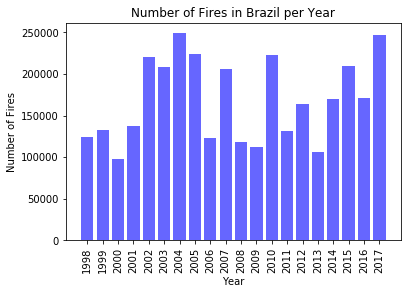

In [13]:
plt.bar(x_axis, firenumbers, color='b', alpha=0.6, align="center")

plt.title("Number of Fires in Brazil per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)

In [14]:
newnew = new_fire_df.drop(["Month"], axis=1)

by_state = newnew.groupby(["State", "Year"])

state_sum = by_state.sum()["Number of Fires"]
state_sum_df = pd.DataFrame(state_sum)
state_sum_df.head(5)

Number of Fires
State Year                 
AC    1998              730
      1999              333
      2000              434
      2001              828
      2002             3491

In [19]:
states = np.unique(newdf["State"])
states

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [21]:
newdf

,Year,State,Number of Fires
0,1998,AC,0
1,1999,AC,0
2,2000,AC,0
3,2001,AC,0
4,2002,AC,0
5,2003,AC,10
6,2004,AC,0
7,2005,AC,12
8,2006,AC,4
9,2007,AC,0


In [25]:
convert_dict = {'Year': str}

new_df = newdf.astype(convert_dict) 
print(new_df.dtypes)

Year               object
State              object
Number of Fires     int64
dtype: object


ValueError: too many values to unpack (expected 1)

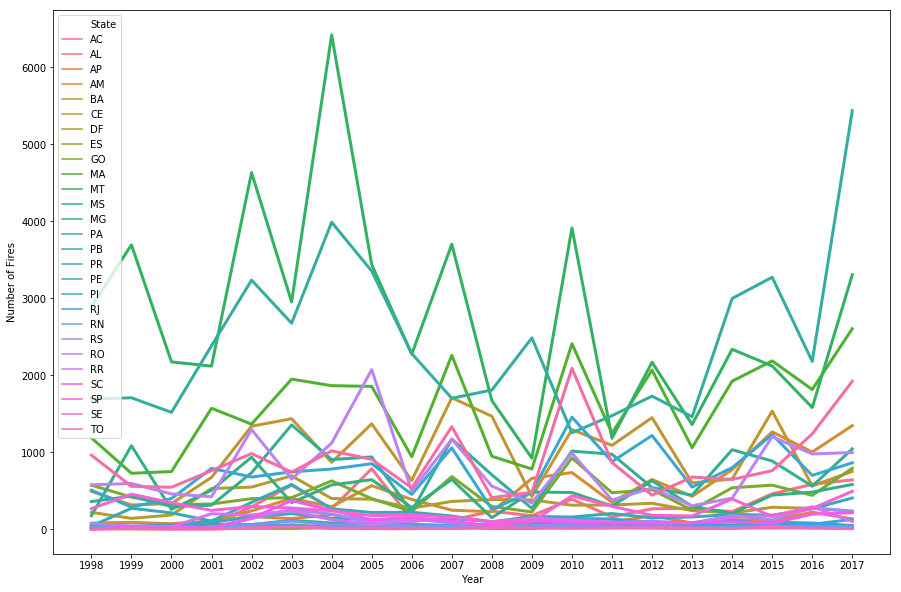

In [26]:
#change year to string 
fig, ax = plt.subplots(figsize=(15, 10), )
ax = sns.lineplot(x = 'Year', y = "Number of Fires", data = new_df, hue = 'State', lw = 3, 
                  err_style = None,)
tick_locations = [value for value in x_axis]
handles, = states
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Fires")
ax.set_title('Fires by State by Year', fontweight = "bold", fontsize = 15)
ax.legend(handles, loc="best", prop={'size': 12})
plt.tight_layout()
ax.grid()
plt.show()
ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=8)

#plt.savefig("output_data/def_state_year.png", dpi=fig.dpi)

#groupedBarChart

In [34]:
Xstate_mean_df = state_sum.groupby(["State"]).mean()
Xstate_mean_df = pd.DataFrame(Xstate_mean_df)
Xstate_mean_df

,Number of Fires
State,
AC,3417.25
AL,232.20
AM,5873.35
AP,1255.80
BA,11348.95
CE,4008.10
DF,178.05
ES,327.30
GO,5598.50


In [40]:
AmazonAC = Xstate_mean_df.loc[('AC')]
AmazonAM = Xstate_mean_df.loc[('AM')]
AmazonAP = Xstate_mean_df.loc[('AP')]
AmazonMA = Xstate_mean_df.loc[('MA')]
AmazonMT = Xstate_mean_df.loc[('MT')]
AmazonPA = Xstate_mean_df.loc[('PA')]
AmazonRO = Xstate_mean_df.loc[('RO')]
AmazonRR = Xstate_mean_df.loc[('RR')]
AmazonTO = Xstate_mean_df.loc[('TO')]

data = [AmazonAC, AmazonAM, AmazonAP, AmazonMA, AmazonMT, AmazonPA, AmazonRO, AmazonRR, AmazonTO]

Amazon_mean_df = df = pd.DataFrame(data) 
Amazon_mean_df

Amazon_mean_df.to_csv("data/Amazon_mean_df.csv")

In [ ]:
#state_sum_df.plot(kind='bar',x='Year',y='Number of Fires')

In [ ]:
#new_rain_df = rain_df.rename(columns={"year":"Year", "month":"Month", "precipitation": "Precipitation", "state":"State"})

In [ ]:
#new_rain_df = new_rain_df.drop(["Unnamed: 1"], axis=1)

In [ ]:
#new_rain_df.head()

In [ ]:
#merged_df = pd.merge(new_rain_df, new_fire_df, on=['Year', 'Month','State'])

In [ ]:
#merged_df.head(12)

In [ ]:
#year_group = merged_df.groupby(["Year"])
#year_group.head()

In [ ]:
#sum_ = year_group.sum()["Number of Fires"]
#sum_

In [ ]:
#fire_df = fire_df.drop("Month", axis=1)

In [ ]:
#fire_df = fire_df.drop("Date", axis=1)

In [ ]:
#fire_df = fire_df.rename(columns={"Ano":"Year"})

In [ ]:
#merged_df.head()

In [ ]:
#merged_df = merged_df.rename(columns={"Number":"Number of Fires"})

In [ ]:
#merged_df.head()

In [ ]:
#merged_df.to_csv("data/merged_df_new.csv")

In [ ]:
#merged_df.dtypes

In [ ]:
#convert_dict = {'Year': str, 'Number of Fires': int}

#new_df = merged_df.astype(convert_dict) 
#print(new_df.dtypes)

In [ ]:
#new_df = merged_df.drop(["Precipitation"], axis=1)
#new_df.head()

In [ ]:
# new_df = new_df.drop(["Month"])
# new_df.head()

In [ ]:
#year_df = new_df.groupby(["Year"])
#year_df.head(5)

In [ ]:
#sum_ = year_df.sum()["Number of Fires"]

In [ ]:
#sum_ = year_df.sum()["Number of Fires"]
#sum_

In [ ]:
#Fire Data
#new_df = merged_df.astype(convert_dict)
#new_df = merged_df.drop(columns="Month")
#new_df = new_df.drop(columns="Precipitation")
#new_df.head()

In [ ]:
#year_df = new_df.groupby(["Year"])
#year_df.head()

#sum_df = year_df.sum()["Number of Fires"]
#sum_df